# Initial Data Exploration of COVIDActNow API
## Derrick Ngo

In [11]:
#import dependencies
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from config import covid_api

In [3]:
#setup base url and perform initial get request
covid_base_url = 'https://api.covidactnow.org/v2/states.json?apiKey='+covid_api
covid_json = requests.get(covid_base_url).json()
#covid_head = covid_json[]
#print out initial data
#print(json.dumps(covid_head, indent=4))

In [3]:
#create dataframe using append
#states_df = pd.DataFrame()
#states_df['State']=''
#states_df['Deaths']=''
#for state in covid_head:
#    states_df=states_df.append({
#        'State':state['state'],
#        'Deaths':state['actuals']['deaths']
#    }, ignore_index=True)
#states_df.head()

In [4]:
#create dataframe using concat
states_df2 = pd.DataFrame()
for state in covid_json:
    state_temp = pd.DataFrame({
        'State':[state['state']],
        'Population':[state['population']],
        
        'Vaccination Ratio':[state['metrics']['vaccinationsInitiatedRatio']],
        'Weekly New Cases (per 100k)':[state['metrics']['weeklyNewCasesPer100k']],
        'Infection Rate':[state['metrics']['infectionRate']],
        
        'Cases':[state['actuals']['cases']],
        'Deaths':[state['actuals']['deaths']],
        'Hospital Beds':[state['actuals']['hospitalBeds']['capacity']],
        'Covid ICU Usage':[state['actuals']['hospitalBeds']['currentUsageCovid']]
    })
    states_df2=pd.concat([
        states_df2,
        state_temp
    ], ignore_index=True)
states_df2.head()

,State,Population,Vaccination Ratio,Weekly New Cases (per 100k),Infection Rate,Cases,Deaths,Hospital Beds,Covid ICU Usage
0,AK,731545,0.725,67.5,1.15,300732,1390,1702,34
1,AL,4903185,0.647,118.4,1.34,1552527,21149,13414,403
2,AR,3017804,0.694,119.1,1.21,972465,12611,7411,309
3,AZ,7278717,0.767,219.6,1.22,2352189,31822,14750,1215
4,CA,39512223,0.84,143.5,1.05,11559335,100005,62346,4910


In [5]:
states_df2.to_csv('StatesCleaned.csv')

In [5]:
# Create Dataframe including ALL Vaccines Info 
states_df3 = pd.DataFrame()
for state in covid_json:
    state_temp = pd.DataFrame({
        'State':[state['state']],
        'Population':[state['population']],
        
        'Vaccination Ratio':[state['metrics']['vaccinationsInitiatedRatio']],
        'Weekly New Cases (per 100k)':[state['metrics']['weeklyNewCasesPer100k']],
        'Infection Rate':[state['metrics']['infectionRate']],
        
        'Vaccines Initiated (1st Dose)':[state['actuals']['vaccinationsInitiated']],
        'Vaccinations Completed (1st & 2nd Dose)':[state['actuals']['vaccinationsCompleted']],
        'Vaccinations Additional Dose (1st, 2nd Dose & Booster)':[state['actuals']['vaccinationsAdditionalDose']],
        'Vaccines Administered':[state['actuals']['vaccinesAdministered']],
        'Vaccines Distributed':[state['actuals']['vaccinesDistributed']],

        'Cases':[state['actuals']['cases']],
        'Deaths':[state['actuals']['deaths']],
        'Hospital Beds':[state['actuals']['hospitalBeds']['capacity']],
        'Covid ICU Usage':[state['actuals']['hospitalBeds']['currentUsageCovid']]
    })
    states_df3=pd.concat([
        states_df3,
        state_temp
    ], ignore_index=True)
states_df3.tail(30)

,State,Population,Vaccination Ratio,Weekly New Cases (per 100k),Infection Rate,Vaccines Initiated (1st Dose),Vaccinations Completed (1st & 2nd Dose),"Vaccinations Additional Dose (1st, 2nd Dose & Booster)",Vaccines Administered,Vaccines Distributed,Cases,Deaths,Hospital Beds,Covid ICU Usage
23,MN,5639632,0.782,81.0,1.09,4410896,4040479,2517728,12322471,17080960,1713190,14094,9519,705
24,MO,6137428,0.689,129.8,1.23,4225677,3596556,1681717,10212927,14742255,1719064,23118,14506,989
25,MP,53605,0.864,None,None,46340,43770,23056,114967,140780,11829,41,None,None
26,MS,2976149,0.614,113.5,1.62,1826743,1591245,648180,4217164,6856765,943402,13079,8452,235
27,MT,1068778,0.678,86.7,1.0,724377,628436,324926,1810570,2558995,319287,3617,2593,77
28,NC,10488084,None,110.6,1.28,6988154,6545097,3849078,None,None,3282404,28661,20753,1775
29,ND,762062,0.688,143.3,1.18,524471,443538,212460,1272939,1783950,277366,2434,1675,61
30,NE,1934408,0.729,123.2,1.1,1410374,1273360,698394,3694014,5131540,545463,4809,4541,291
31,NH,1359711,None,94.1,1.18,None,None,None,None,None,362649,2828,2476,85
32,NJ,8882190,0.939,183.5,1.14,8342750,6977486,3577505,19284388,27722565,2864909,35222,21304,1377


In [6]:
states_df3.to_csv('StatesCleaned_Vaccine.csv')

In [7]:
# Import the Clean Vaccine dataset, drop missing data 'NaN' found in Vaccine Counts
vacc_data = pd.read_csv('StatesCleaned_Vaccine.csv')
# drops n/a in columns
vacc_data = vacc_data.drop('Unnamed: 0',axis=1)
vacc_data = vacc_data.dropna()
vacc_data

,State,Population,Vaccination Ratio,Weekly New Cases (per 100k),Infection Rate,Vaccines Initiated (1st Dose),Vaccinations Completed (1st & 2nd Dose),"Vaccinations Additional Dose (1st, 2nd Dose & Booster)",Vaccines Administered,Vaccines Distributed,Cases,Deaths,Hospital Beds,Covid ICU Usage
0,AK,731545,0.725,67.5,1.15,530653.0,474042.0,230640.0,1291050.0,2017415.0,300732,1390,1702.0,34.0
1,AL,4903185,0.647,118.4,1.34,3171595.0,2593348.0,1017174.0,6873874.0,11756440.0,1552527,21149,13414.0,403.0
2,AR,3017804,0.694,119.1,1.21,2094057.0,1705795.0,748393.0,4754717.0,7889930.0,972465,12611,7411.0,309.0
3,AZ,7278717,0.767,219.6,1.22,5579783.0,4773539.0,2346592.0,14108389.0,18625270.0,2352189,31822,14750.0,1215.0
4,CA,39512223,0.840,143.5,1.05,33194353.0,29309317.0,16980898.0,85284471.0,113415485.0,11559335,100005,62346.0,4910.0
5,CO,5758736,0.831,133.3,1.03,4784753.0,4206413.0,2395250.0,12622401.0,16479775.0,1715828,13701,10325.0,471.0
6,CT,3565287,0.950,124.1,1.12,3614903.0,2940800.0,1613688.0,8766794.0,11235725.0,930547,11603,7550.0,562.0
8,DE,973764,0.867,121.0,1.19,843816.0,701269.0,347585.0,2022968.0,3098755.0,318134,3172,2521.0,198.0
9,FL,21477737,0.819,72.0,1.34,17588427.0,14823571.0,6436635.0,41185511.0,58124935.0,7223005,83100,54241.0,1703.0
10,GA,10617423,0.677,55.6,1.24,7186221.0,6024977.0,2574688.0,16495630.0,27047205.0,2857433,39637,19927.0,1108.0


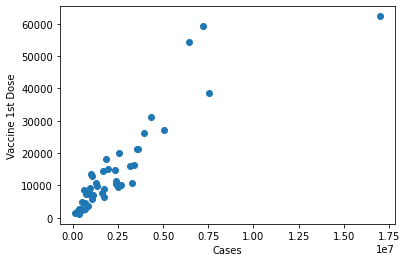

In [8]:
# For the first graph, determining which pairs of factors are correlated. 
plt.scatter(vacc_data.iloc[:,7],vacc_data.iloc[:,12])
plt.xlabel('Cases')
plt.ylabel('Vaccine 1st Dose')
plt.show()

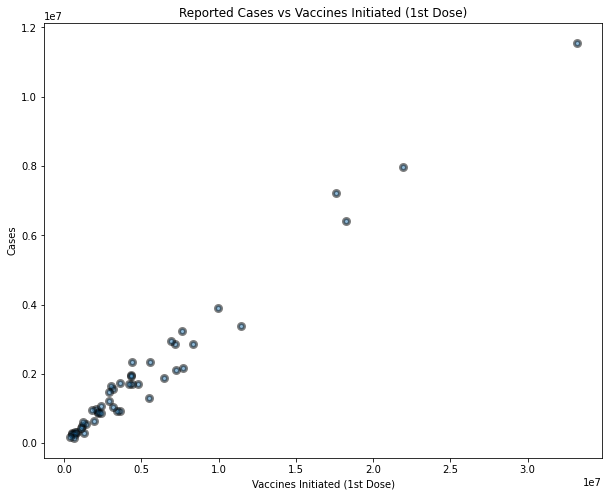

In [9]:

# Create a scatter plot for cases vs vaccines temperature.
#fig1, ax1 = plt.subplots(figsize=(10,8))
x_values = vacc_data['Vaccines Initiated (1st Dose)']
y_values = vacc_data['Cases']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.50, edgecolors = "k", linewidths = 3)
plt.xlabel('Vaccines Initiated (1st Dose)')
plt.ylabel('Cases')
plt.title("Reported Cases vs Vaccines Initiated (1st Dose)")
#plt.grid()
#plt.savefig("./output_data/latitude_vs_temperature.png", bbox_inches="tight")
plt.show()

In [13]:
# The Pearson correlation coefficient between "1st Vaccine Dose" and "Cases"
cases = vacc_data.iloc[:,7]
first_dose = vacc_data.iloc[:,12]
correlation = st.pearsonr(cases,first_dose)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.9


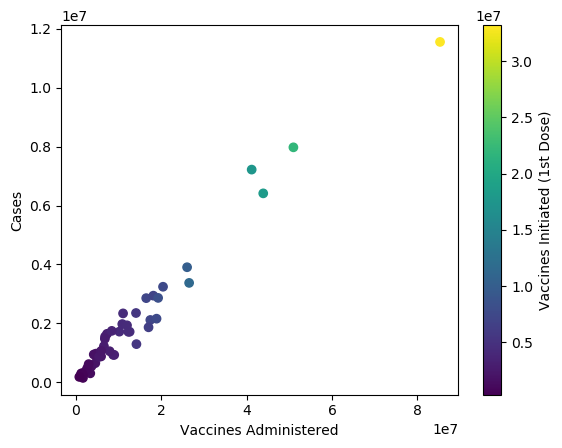

In [7]:
#Plot Total Cases and Vaccines Administered using Matplotlib, color the data points using the population.
plt.scatter(vacc_data['Vaccines Administered'],vacc_data['Cases'],c=vacc_data['Vaccines Initiated (1st Dose)'])
clb = plt.colorbar()
plt.xlabel("Vaccines Administered")
plt.ylabel("Cases")
clb.set_label("Vaccines Initiated (1st Dose)")
plt.show()

In [8]:
# DATA SET
vaccines = ["1st Dose", "2nd Dose", "Plus Booster"]
actuals = [4410896, 4040479, 2517728]

In [18]:
# VACCINE PIE
vaccines = ["1st Dose", "2nd Dose", "Booster"]
actuals = [4410896, 4040479, 2517728]
colors = ["yellowgreen", "red", "lightskyblue"]
explode = (0.05, 0, 0)

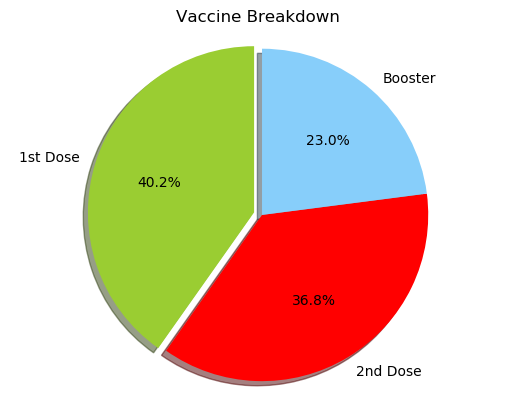

In [19]:
plt.title("Vaccine Breakdown")
plt.pie(actuals, explode=explode, labels=vaccines, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()